In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\dobil\OneDrive\Desktop\MACHINE-LEARNING\Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
y_pred=dtc.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[47  5]
 [ 2 26]]
Accuracy:
 0.9125


<Axes: >

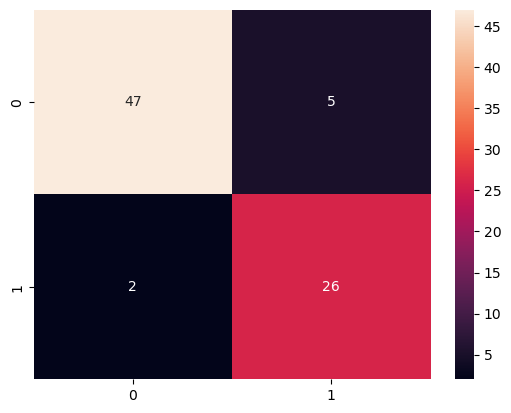

In [19]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

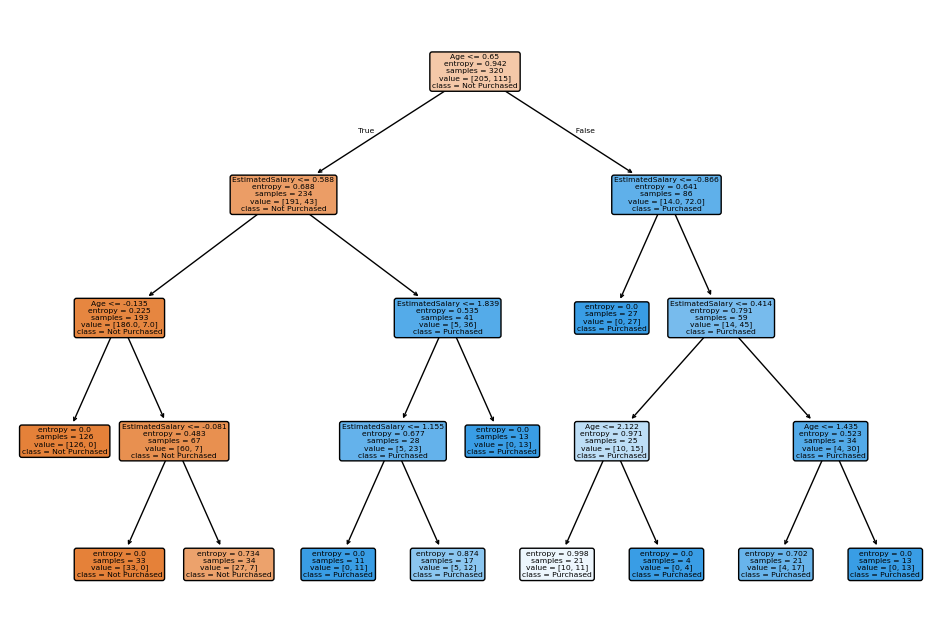

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(
    dtc,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True,
    
  
)
plt.show()
